In [52]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
STOP_WORDS = nltk.corpus.stopwords.words()
gatsby = open("./Gatsby.txt", "r", encoding=('utf-8')).read()
def tokenize(text):
    broken_text = text.replace('\n', ' ')
    result = []
    for i in nltk.tokenize.sent_tokenize(broken_text):
        temp = []
        for j in nltk.tokenize.word_tokenize(i):
            temp.append(j.lower())
        result.append(temp)
    return result
gatsby = tokenize(gatsby)

In [62]:
model = word2vec.Word2Vec(gatsby, size=1000, window=20, min_count=10, workers=8, sg=1, iter=20)
model.wv['gatsby']

array([ 7.94767588e-02, -6.57552993e-03,  6.12186678e-02,  6.37583211e-02,
        4.59891260e-02, -2.95585096e-02, -8.42765346e-02,  6.20914809e-02,
        1.39554990e-02,  4.75680642e-03,  4.49078381e-02,  8.05516094e-02,
        4.13538003e-03,  4.90326099e-02, -8.05500820e-02, -5.74972155e-03,
        5.08111827e-02,  5.19264750e-02, -3.14247943e-02,  2.60727052e-02,
       -8.66693333e-02, -4.40660752e-02, -3.30122299e-02, -3.78020257e-02,
        3.05949468e-02,  4.29833755e-02, -2.77439691e-03, -5.50800972e-02,
        6.51618466e-03,  4.29280177e-02,  4.21097465e-02,  1.63870603e-02,
       -1.97935347e-02,  7.49769900e-03,  6.55145943e-02,  1.00665197e-01,
       -4.17486466e-02,  3.25466059e-02, -6.59833923e-02, -8.80361944e-02,
       -1.11270025e-01,  1.02849025e-03, -4.61961441e-02, -9.56836864e-02,
        9.58509836e-03, -6.10333234e-02, -3.48141007e-02,  8.07246342e-02,
       -5.72577026e-03, -3.53694558e-02, -6.88690096e-02, -2.30638478e-02,
        4.61255610e-02, -

In [63]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=100, n_components=2, init='pca', n_iter=25000, random_state=42)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

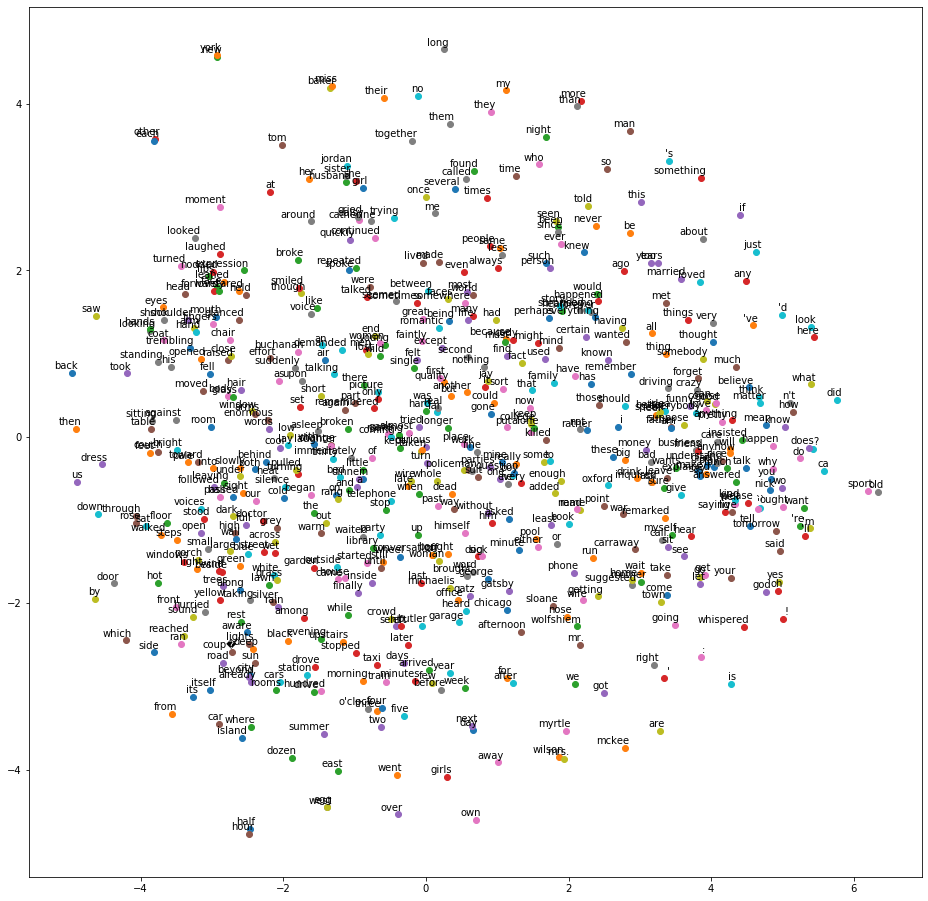

In [64]:
tsne_plot(model)

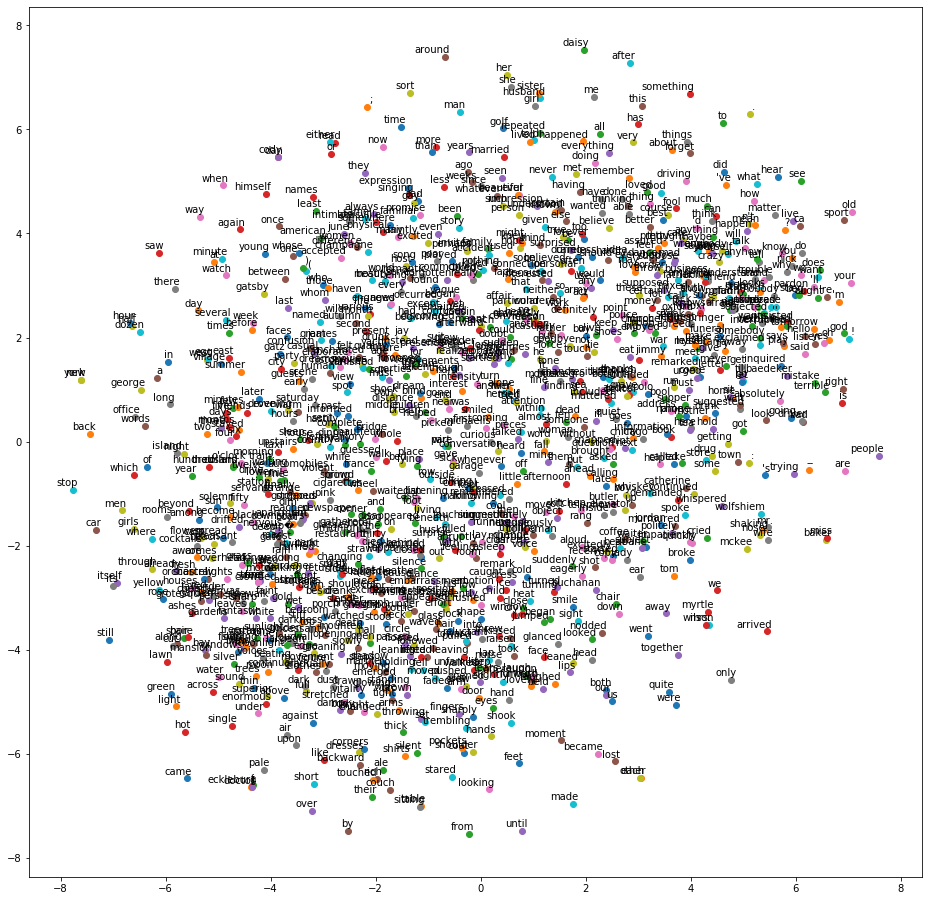

In [65]:
new_model = word2vec.Word2Vec(gatsby, size=1000, window=20, min_count=5, workers=8, sg=1, iter=20)
tsne_plot(new_model)

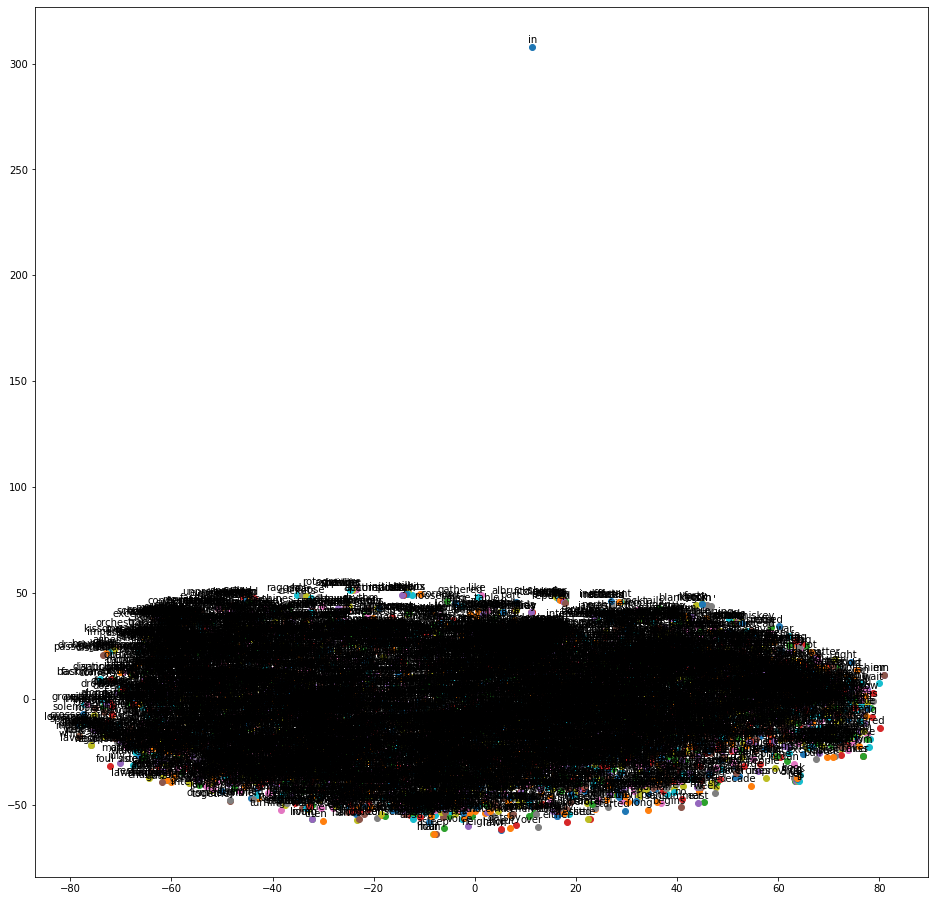

In [66]:
one_model = word2vec.Word2Vec(gatsby, size=1000, window=20, min_count=1, workers=8, sg=1, iter=20)
tsne_plot(one_model)

In [86]:
model.most_similar(positive=['dream'], topn=20)

KeyError: "word 'dream' not in vocabulary"

In [87]:
new_model.most_similar(positive=['dream'], topn=20)

[('sudden', 0.8149108290672302),
 ('water', 0.8044490218162537),
 ('memory', 0.7985687255859375),
 ('warm', 0.7739470601081848),
 ('complete', 0.7635995745658875),
 ('secret', 0.7594773769378662),
 ('blind', 0.747555136680603),
 ('instead', 0.7456547617912292),
 ('great', 0.7399521470069885),
 ('presence', 0.7359402775764465),
 ('hard', 0.7355718612670898),
 ('view', 0.7348576784133911),
 ('spot', 0.7341820001602173),
 ('worried', 0.7285360097885132),
 ('helped', 0.726097822189331),
 ('bay', 0.7256000638008118),
 ('continually', 0.7252572774887085),
 ('stretched', 0.724409282207489),
 ('turn', 0.7228932976722717),
 ('strained', 0.7216343879699707)]

In [88]:
one_model.most_similar_cosmul(positive=['dream'], topn=20)

[('fail', 0.9550245404243469),
 ('grasp', 0.9508716464042664),
 ('intriguing', 0.9359753727912903),
 ('chain', 0.9349600672721863),
 ('loving', 0.9322047829627991),
 ('star', 0.9293456077575684),
 ('false', 0.9289100170135498),
 ('fought', 0.9285691380500793),
 ('harder', 0.928331196308136),
 ('tea-table', 0.9279382824897766),
 ('stained', 0.9278914332389832),
 ('intimation', 0.9269424676895142),
 ('sheep', 0.9256665110588074),
 ('return', 0.9252227544784546),
 ('strong', 0.9250851273536682),
 ('committed', 0.9250335097312927),
 ('price', 0.9246163964271545),
 ('recover', 0.9246117472648621),
 ('flock', 0.9245471358299255),
 ('twice', 0.9235208034515381)]